In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import sympy as smp
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

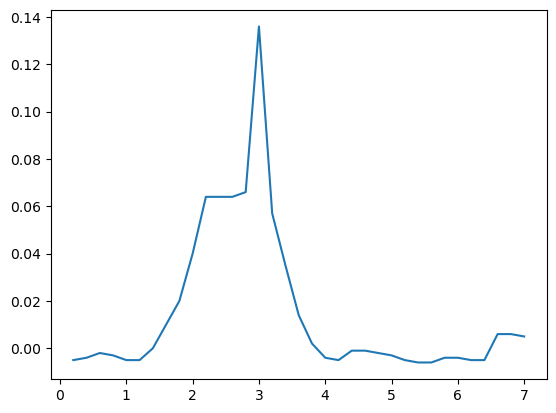

In [3]:
x=np.ones([35])
x2=0
x3=list()
for i in x:
    x2=0.2*i+x2
    x3.append(x2)
y=np.array([-0.005,-0.004,-0.002,-0.003,-0.005,-0.005,0,0.01,0.02,0.04,0.064,0.064,0.064,0.066,0.136,0.057,0.035,0.014,0.002,-0.004,-0.005,-0.001,-0.001,-0.002,-0.003,-0.005,-0.006,-0.006,-0.004,-0.004,-0.005,-0.005,0.006,0.006,0.005])
plt.plot(x3,y);

# Part 1: "Solvable" Integrals

**Example**: Find $\int sin^3(x) e^{-5x} dx$

In [4]:
x=smp.symbols("x",real=True)
x#sympy sembolünü tanımlamış oldun.

x

In [5]:
f=smp.sin(x)**3*smp.exp(-5*x)
f

exp(-5*x)*sin(x)**3

In [6]:
sol=smp.integrate(f,x)
sol

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Example**:Find $\int cos(bx) e^{-ax}dx$

In [7]:
x,a,b=smp.symbols("x a b",real=True,positive=True)
f=smp.cos(b*x)*smp.exp(-a*x)
sol=smp.integrate(f,x)

In [8]:
sol.simplify()#Simplify yaparak daha da basitleştirebilrisin.

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Example**: Find  $\int \frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}} dx$

In [9]:
f=(1+smp.sqrt(x))**smp.Rational(1,3)/smp.sqrt(x)#smp rationala dikkat et.
smp.integrate(f,x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Example** (Definite) Find $\int_{0}^{\ln(4)}\frac{e^x}{\sqrt{e^{2x}+9}} dx$

In [10]:
f=smp.exp(x) / smp.sqrt(smp.exp(2*x)+9)
smp.integrate(f,(x,0,smp.log(4))).evalf()#evalf float şeklinde sayı ile gösteriyo.

0.771162138430851

**Example** (Improper) Find $ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $

In [11]:
f=16* smp.atan(x) / (1+x**2)
smp.integrate(f,(x,0,smp.oo))

2*pi**2

# PART2:"Unsolvable"Integrals

**Example**: Find $\int_{1}^{2} e^{-\sin(x)} dx$

In [13]:
#f=smp.exp(-smp.sin(x))
#smp.integrate(f,(x,1,2))
#nümerik çözüm için scipydaki quad fonksiyonunu kullanıyoruz. 

In [15]:
f=lambda x:np.exp(-np.sin(x))
quad(f,1,2)#soldaki bulunan değer sağdaki ise hata payı.

(0.3845918142796868, 4.2698268729567035e-15)

**Example**: Find $\int_{0}^{2\pi} \frac{1}{(a-\cos(x))^2 + (b-\sin(x))^2} dx$

In [18]:
f=lambda x:1/((a-np.cos(x))**2+(b-np.sin(x)**2))
a,b=2,3# bunu nümerik çözmek için a ve byi bilmemiz lazım
quad(f,0,np.pi)

(0.5299789763359872, 7.185358738693353e-14)

In [19]:
def f(x,a,b):
    return 1/((a-np.cos(x))**2+(b-np.sin(x)**2))

In [28]:
a_array=np.arange(2,10,1)
b_array=np.arange(2,10,1)
integrals=[[a,b,quad(f,0,2*np.pi,args=(a,b))[0]]for a in a_array for b in b_array]

In [29]:
integrals

[[2, 2, 1.3204328490024448],
 [2, 3, 1.0599579526719745],
 [2, 4, 0.890701768480323],
 [2, 5, 0.7706780278580997],
 [2, 6, 0.6805771484008314],
 [2, 7, 0.610165612768974],
 [2, 8, 0.5534688968201973],
 [2, 9, 0.5067441630668557],
 [3, 2, 0.667112857864407],
 [3, 3, 0.5955303892513163],
 [3, 4, 0.5388100160763287],
 [3, 5, 0.49258713363045037],
 [3, 6, 0.45409052199464267],
 [3, 7, 0.4214666150706016],
 [3, 8, 0.3934235805957782],
 [3, 9, 0.3690305754732199],
 [4, 2, 0.38654754109383405],
 [4, 3, 0.3621950725663052],
 [4, 4, 0.34090977150827595],
 [4, 5, 0.3221236127474473],
 [4, 6, 0.3054043056882415],
 [4, 7, 0.2904163467566745],
 [4, 8, 0.27689490759790625],
 [4, 9, 0.2646278419346747],
 [5, 2, 0.24964018394360898],
 [5, 3, 0.23949550248655294],
 [5, 4, 0.23018316338999714],
 [5, 5, 0.22160104725463445],
 [5, 6, 0.21366352119301707],
 [5, 7, 0.20629817884185148],
 [5, 8, 0.19944333476512063],
 [5, 9, 0.19304607519192052],
 [6, 2, 0.17395476750257716],
 [6, 3, 0.16904680232345054],
 [

# Numerical Case

Nümerik durumlar birazdaha topladığımız gerçek dataları sayısal halde çözmek için yaptığımız söylenebilir.

In [92]:
x,y=np.loadtxt('C:\\Users\\ILKAY\\Desktop\\Data.txt')

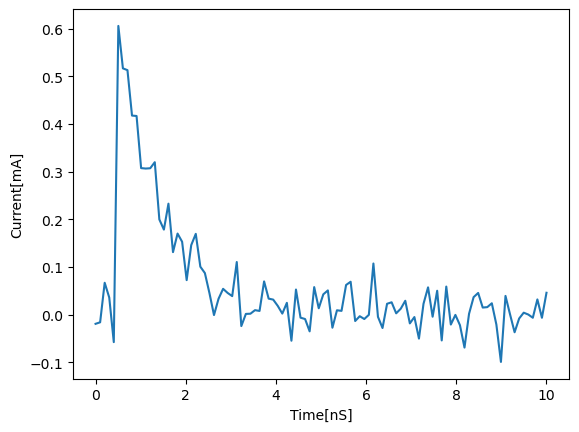

In [93]:
plt.plot(x,y)
plt.xlabel("Time[nS]")
plt.ylabel("Current[mA]");

Zamana bağlı değişen akımın integrali enerjiyi verir.

In [94]:
integral=cumulative_trapezoid(y,x,initial=0)

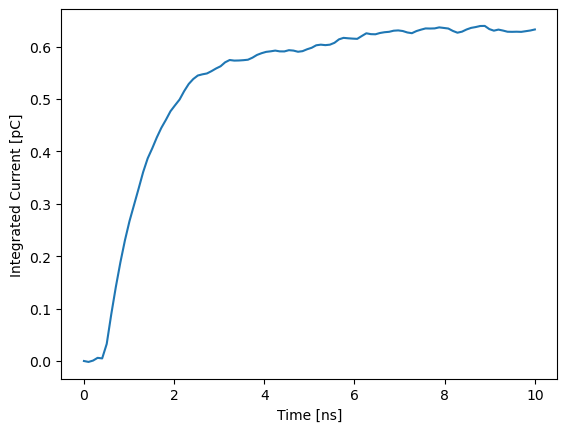

In [95]:
plt.plot(x, integral)
plt.xlabel('Time [ns]')
plt.ylabel('Integrated Current [pC]')
plt.show()

In [96]:
x,y=np.loadtxt('C:\\Users\\ILKAY\\Desktop\\coviddata.txt')

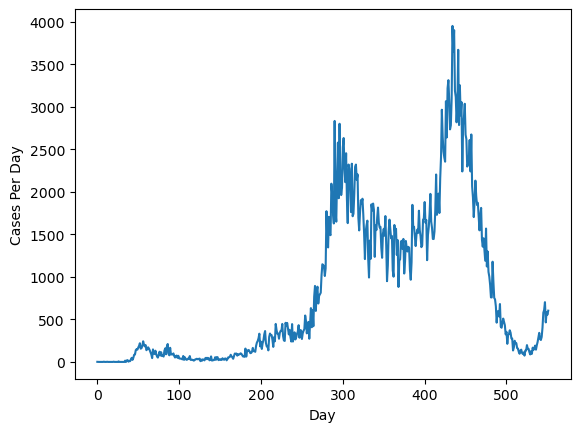

In [97]:
plt.plot(x,y)
plt.xlabel("Day")
plt.ylabel("Cases Per Day");# Kafadan attığım veriler ile yapıldı.

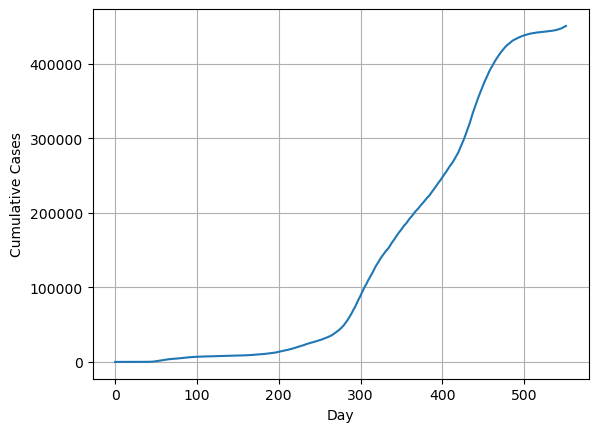

In [98]:
integral=cumulative_trapezoid(y,x,initial=0)
plt.plot(x,integral)
plt.xlabel("Day")
plt.ylabel("Cumulative Cases")
plt.grid();#Grid grafigi kareye bölüyor.